**Midterm Project**  
Group Member: Quinn Gan, Ravi Reddy, Deyu Zhang

**Introduction**  
text 

**Load Data**

In [1]:
import requests
import pandas as pd

In [5]:
url = (
    "https://openpaymentsdata.cms.gov"
    "/api/1/metastore/schemas/dataset/items/"
    "fb3a65aa-c901-4a38-a813-b04b00dfa2a9"
)

r = requests.get(url)
r.raise_for_status()
meta = r.json()


In [7]:
meta["distribution"]

[{'title': 'General Payment Data – Detailed Dataset 2023 Reporting Year',
  'mediaType': 'text/csv',
  'format': 'csv',
  'downloadURL': 'https://download.cms.gov/openpayments/PGYR2023_P01232026_01102026/OP_DTL_GNRL_PGYR2023_P01232026_01102026.csv',
  'describedBy': 'https://openpaymentsdata.cms.gov/api/1/metastore/schemas/data-dictionary/items/71ec19df-f5ef-5b99-b43b-e566e22670b7',
  'describedByType': 'application/vnd.tableschema+json'}]

In [8]:
csv_url = meta["distribution"][0]["downloadURL"]

In [10]:
cols = pd.read_csv(csv_url, nrows=0).columns
cols

Index(['Change_Type', 'Covered_Recipient_Type', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name',
       'Covered_Recipient_Profile_ID', 'Covered_Recipient_NPI',
       'Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name',
       'Covered_Recipient_Last_Name', 'Covered_Recipient_Name_Suffix',
       'Recipient_Primary_Business_Street_Address_Line1',
       'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code',
       'Covered_Recipient_Primary_Type_1', 'Covered_Recipient_Primary_Type_2',
       'Covered_Recipient_Primary_Type_3', 'Covered_Recipient_Primary_Type_4',
       'Covered_Recipient_Primary_Type_5', 'Covered_Recipient_Primary_Type_6',
       'Covered_Recipient_Specialty_1', 'Covered_Recipient_Specialty_2',
       'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4',
       'Covered_Recipie

In [14]:
usecols = [
    "Covered_Recipient_Profile_ID",
    "Covered_Recipient_First_Name",
    "Covered_Recipient_Last_Name",
    "Covered_Recipient_Type",
    "Covered_Recipient_Specialty_1",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Number_of_Payments_Included_in_Total_Amount",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Nature_of_Payment_or_Transfer_of_Value",
    "Recipient_State",
    "Recipient_City",
    "Change_Type"
]


In [17]:
chunks = pd.read_csv(
    csv_url,
    usecols=usecols,
    chunksize=200_000,
    low_memory=False
)

df = pd.concat(chunks, ignore_index=True)

**Quality Check & Data Processing**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700786 entries, 0 to 14700785
Data columns (total 14 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Change_Type                                                    object 
 1   Covered_Recipient_Type                                         object 
 2   Covered_Recipient_Profile_ID                                   float64
 3   Covered_Recipient_First_Name                                   object 
 4   Covered_Recipient_Last_Name                                    object 
 5   Recipient_City                                                 object 
 6   Recipient_State                                                object 
 7   Covered_Recipient_Specialty_1                                  object 
 8   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  object 
 9   Total_Amount_of_Payment_USDollars           

In [18]:
df.head()

,Change_Type,Covered_Recipient_Type,Covered_Recipient_Profile_ID,Covered_Recipient_First_Name,Covered_Recipient_Last_Name,Recipient_City,Recipient_State,Covered_Recipient_Specialty_1,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Total_Amount_of_Payment_USDollars,Date_of_Payment,Number_of_Payments_Included_in_Total_Amount,Nature_of_Payment_or_Transfer_of_Value,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1
0,UNCHANGED,Covered Recipient Physician,760737.0,HILARY,FRANK,MAPLE GROVE,MN,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.30,09/11/2023,1,Food and Beverage,NaN
1,UNCHANGED,Covered Recipient Physician,267460.0,ANTHONY,SANDERS,INDIANAPOLIS,IN,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",13.25,08/17/2023,1,Food and Beverage,NaN
2,UNCHANGED,Covered Recipient Physician,1249653.0,MARISA,DAHLMAN,SEATTLE,WA,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",38.39,07/18/2023,1,Food and Beverage,NaN
3,UNCHANGED,Covered Recipient Physician,11544.0,KEVIN,HSIUNG,HENDERSON,NV,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",18.26,10/10/2023,1,Food and Beverage,NaN
4,UNCHANGED,Covered Recipient Physician,351192.0,SHANNON,SUTHERLAND,PERRYSBURG,OH,Allopathic & Osteopathic Physicians|Obstetrics...,"Minerva Surgical, Inc",15.17,09/17/2023,1,Food and Beverage,NaN


In [20]:
df["Date_of_Payment"] = pd.to_datetime(
    df["Date_of_Payment"],
    errors="coerce"
)


In [21]:
df["Date_of_Payment"].isna().mean()


np.float64(0.0)

In [22]:
df["Total_Amount_of_Payment_USDollars"].describe()


count    1.470079e+07
mean     2.254341e+02
std      4.104774e+04
min      0.000000e+00
25%      1.471000e+01
50%      1.947000e+01
75%      2.756000e+01
max      8.837730e+07
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [23]:
(df["Total_Amount_of_Payment_USDollars"] <= 0).sum()


np.int64(3)

In [24]:
df = df[df["Total_Amount_of_Payment_USDollars"] > 0]


In [25]:
df.isna().mean().sort_values(ascending=False)


Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1         8.405770e-02
Covered_Recipient_Last_Name                                      2.159817e-03
Covered_Recipient_First_Name                                     2.142607e-03
Covered_Recipient_Profile_ID                                     2.135941e-03
Covered_Recipient_Specialty_1                                    2.135941e-03
Recipient_State                                                  4.197055e-05
Recipient_City                                                   6.802359e-08
Covered_Recipient_Type                                           0.000000e+00
Change_Type                                                      0.000000e+00
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name    0.000000e+00
Total_Amount_of_Payment_USDollars                                0.000000e+00
Date_of_Payment                                                  0.000000e+00
Number_of_Payments_Included_in_Total_Amount                     

In [26]:
df["Change_Type"].value_counts()
df["Covered_Recipient_Type"].value_counts()
df["Nature_of_Payment_or_Transfer_of_Value"].value_counts().head(10)


Nature_of_Payment_or_Transfer_of_Value
Food and Beverage                                                                                                                                     13455423
Travel and Lodging                                                                                                                                      552442
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program      237680
Consulting Fee                                                                                                                                          174202
Education                                                                                                                                               163444
Gift                                                                                                                                                     31839
Honorar

In [28]:
df.columns = df.columns.str.lower()


In [29]:
df["payment_year"] = df["date_of_payment"].dt.year
df["payment_month"] = df["date_of_payment"].dt.month


In [36]:
df = df.rename(columns={
    "nature_of_payment_or_transfer_of_value": "payment_type",
    "total_amount_of_payment_usdollars": "payment_amount",
    "date_of_payment": "payment_date",
    "covered_recipient_specialty_1": "specialty",
    "covered_recipient_type": "recipient_type",
    "covered_recipient_profile_id": "recipient_id",
    "applicable_manufacturer_or_applicable_gpo_making_payment_name": "manufacturer",
    "number_of_payments_included_in_total_amount": "num_payments",
    "recipient_state": "state",
    "recipient_city": "city",
    "change_type": "change_type"
})


In [41]:
payment_type_map = {
    "Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program":
        "Non-consulting professional services",

    "Consulting Fee": "Consulting",
    "Food and Beverage": "Food & Beverage",
    "Travel and Lodging": "Travel & Lodging",
    "Royalty or License": "Royalty / License",
    "Honoraria": "Honoraria",
    "Education": "Education",
    "Grant": "Grant",
    "Acquisitions": "Acquisitions",
    "Entertainment": "Entertainment",
    "Long term medical supply or device loan": "Device / Supply Loan"
}


In [44]:
df["payment_type_clean"] = (
    df["payment_type"]
    .map(payment_type_map)
    .fillna("Other")
)


In [68]:
df["specialty_clean"] = (
    df["specialty"]
    .str.split("|")
    .str[-1]
    .str.strip()
)


**Payment structure and concentration analysis**

In [45]:
key_vars = [
    "payment_type",
    "payment_amount",
    "specialty",
    "recipient_type",
    "state",
    "payment_date"
]

In [46]:
payment_summary = (
    df.groupby("payment_type_clean")
      .agg(
          n_payments=("payment_amount", "size"),
          total_amount=("payment_amount", "sum"),
          mean_amount=("payment_amount", "mean")
      )
      .sort_values("total_amount", ascending=False)
)

payment_summary.head(10)


,n_payments,total_amount,mean_amount
payment_type_clean,,,
Royalty / License,16313,1.197829e+09,73427.909334
Non-consulting professional services,237680,5.999067e+08,2524.009954
Consulting,174202,5.295906e+08,3040.094817
Food & Beverage,13455423,3.774955e+08,28.055269
Travel & Lodging,552442,1.839568e+08,332.988482
Grant,6481,1.134959e+08,17512.094189
Other,57430,8.617284e+07,1500.484718
Acquisitions,624,7.210692e+07,115555.958093
Education,163444,6.500881e+07,397.743611


In [52]:
payment_summary["share_of_payments"] = (
    payment_summary["n_payments"] / payment_summary["n_payments"].sum()
)

payment_summary["share_of_amount"] = (
    payment_summary["total_amount"] / payment_summary["total_amount"].sum()
)

payment_summary.sort_values("share_of_amount", ascending=False).head(10)


,n_payments,total_amount,mean_amount,share_of_payments,share_of_amount
payment_type_clean,,,,,
Royalty / License,16313,1.197829e+09,73427.909334,0.001110,0.361439
Non-consulting professional services,237680,5.999067e+08,2524.009954,0.016168,0.181019
Consulting,174202,5.295906e+08,3040.094817,0.011850,0.159801
Food & Beverage,13455423,3.774955e+08,28.055269,0.915286,0.113907
Travel & Lodging,552442,1.839568e+08,332.988482,0.037579,0.055508
Grant,6481,1.134959e+08,17512.094189,0.000441,0.034247
Other,57430,8.617284e+07,1500.484718,0.003907,0.026002
Acquisitions,624,7.210692e+07,115555.958093,0.000042,0.021758
Education,163444,6.500881e+07,397.743611,0.011118,0.019616


In [69]:
specialty_summary = (
    df.groupby("specialty_clean")
      .agg(
          total_amount=("payment_amount", "sum"),
          n_payments=("payment_amount", "size")
      )
      .sort_values("total_amount", ascending=False)
)

specialty_summary.head(10)


,total_amount,n_payments
specialty_clean,,
Orthopaedic Surgery,4.068910e+08,213113
Internal Medicine,1.346184e+08,1318250
Neurology,9.068727e+07,459374
Neurological Surgery,8.792750e+07,79630
Dermatology,8.458031e+07,457005
Cardiovascular Disease,7.106804e+07,463325
Hematology & Oncology,7.090738e+07,308999
Adult Reconstructive Orthopaedic Surgery,6.736541e+07,18002
Psychiatry,6.380376e+07,308618


In [55]:
import matplotlib.pyplot as plt

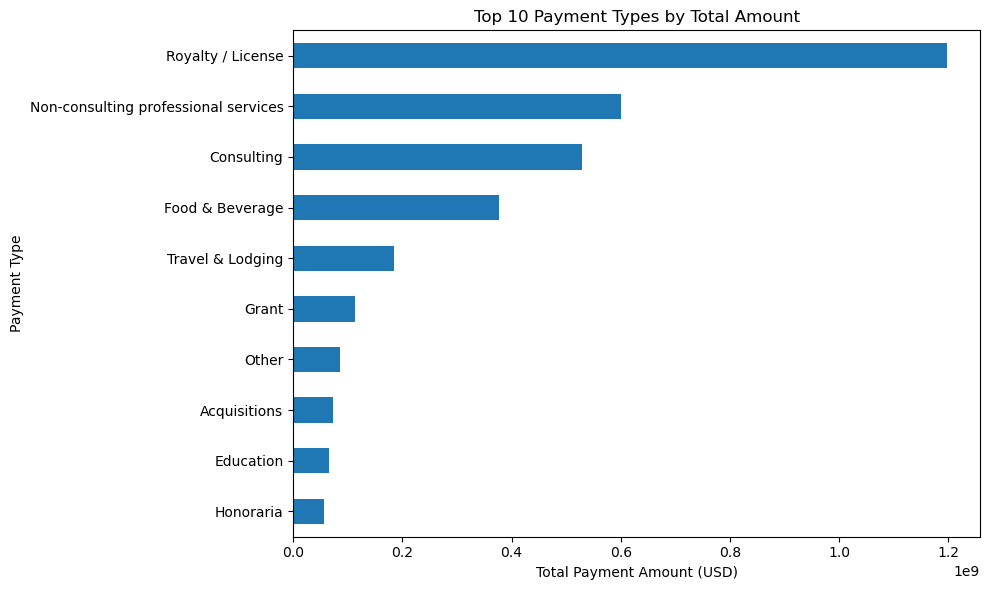

In [58]:
top_amount = (
    df.groupby("payment_type_clean")
      ["payment_amount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
top_amount.sort_values().plot(kind="barh")
plt.xlabel("Total Payment Amount (USD)")
plt.ylabel("Payment Type")
plt.title("Top 10 Payment Types by Total Amount")
plt.tight_layout()
plt.show()


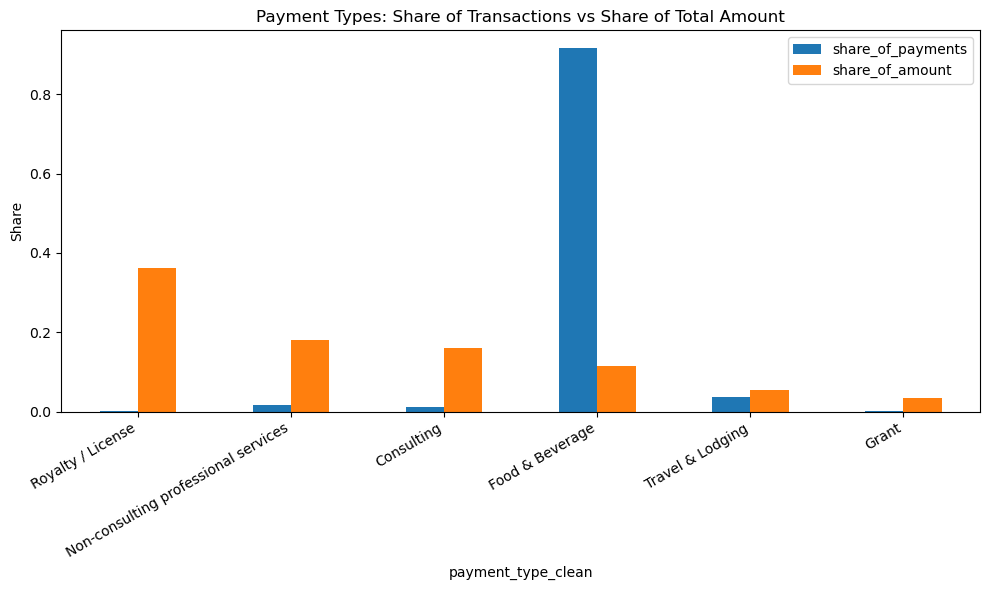

In [66]:
top_idx = (
    payment_summary["share_of_amount"]
    .sort_values(ascending=False)
    .head(6)
    .index
)

compare_df = payment_summary.loc[
    top_idx,
    ["share_of_payments", "share_of_amount"]
]

compare_df.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Share")
plt.title("Payment Types: Share of Transactions vs Share of Total Amount")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

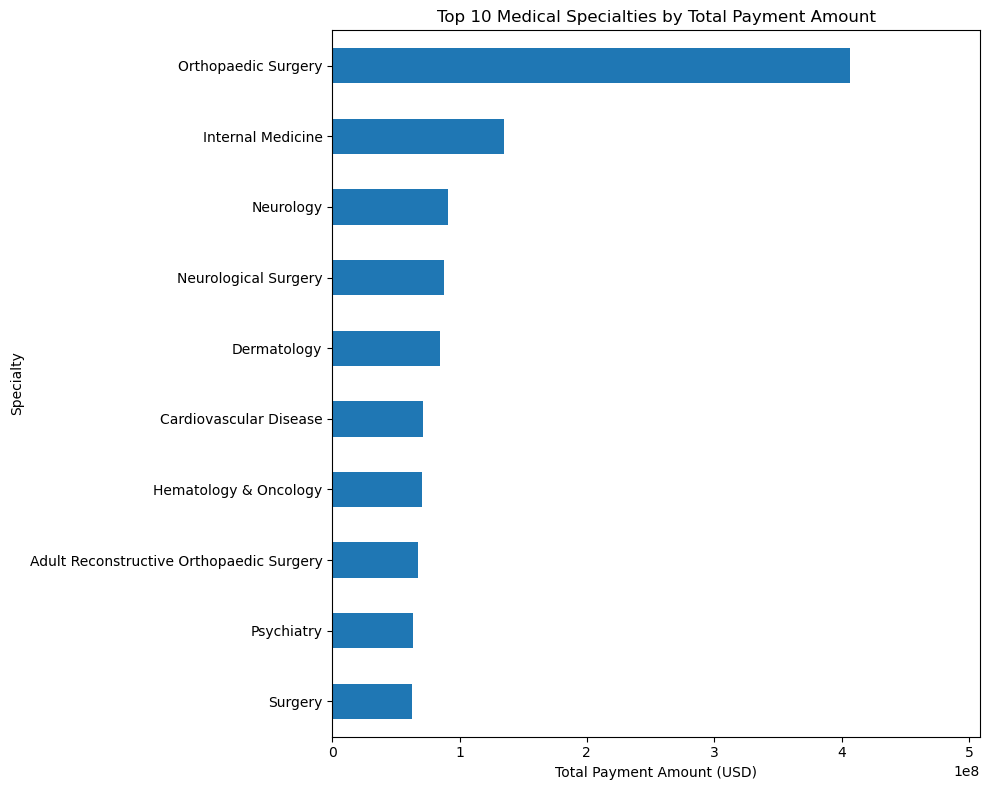

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))

top_specialties.sort_values("total_amount").plot(
    y="total_amount",
    kind="barh",
    ax=ax,
    legend=False
)

ax.set_xlabel("Total Payment Amount (USD)")
ax.set_ylabel("Specialty")
ax.set_title("Top 10 Medical Specialties by Total Payment Amount")

# 👇 核心：把 x 轴右边拉远一点（比如 +20%）
max_val = top_specialties["total_amount"].max()
ax.set_xlim(0, max_val * 1.25)

fig.tight_layout()
plt.show()
